# Condition number study

This notebook shows the study of the condition number of the matrix $A$ as a function of the number of particles and layers in the events.

## $\kappa$ vs. number of particles

The condition number $\kappa$ is evaluated on toy events in a detector with 10 layers. The number of particles ranges between 2 and 30

In [1]:
from trackhhl.toy.simple_generator import SimpleDetectorGeometry, SimpleGenerator
from trackhhl.hamiltonians.simple_hamiltonian import SimpleHamiltonian
from dataclasses import dataclass, field
import mplhep
import matplotlib.pyplot as plt
mplhep.style.use(mplhep.style.LHCb)
import numpy as np
import matplotlib as mpl

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
from scipy.sparse.linalg import eigsh

N_LAYERS = 10           # Half of the VELO
MIN_PARTICLES = 2       
MAX_PARTILCES = 30
STEP = 1     
THRESHOLD = .45
DETECTOR = SimpleDetectorGeometry([i for i in range(N_LAYERS)], [float("+inf") for i in range(N_LAYERS)], [float("+inf") for i in range(N_LAYERS)], [i+1 for i in range(N_LAYERS)])

@dataclass
class RunParticles:
    min_particles: int  = MIN_PARTICLES
    max_particles: int  = MAX_PARTILCES  
    step: int           = STEP
    n_layers: int       = N_LAYERS
    n_particles: int    = field(default_factory=list)
    lambda_min: list    = field(default_factory=list)
    lambda_max: list    = field(default_factory=list)
    kappa: list         = field(default_factory=list)
    hits : list         = field(default_factory=list)
    segments : list     = field(default_factory=list)
    detector : list     = DETECTOR
    max_theta : list    = np.pi / 3
    epsilon : float     = 1e-5
    gamma : float       = 2.0
    delta : float       = 1.0
    
              
    def execute(self):
        generator = SimpleGenerator(self.detector, theta_max=self.max_theta)
    
        for n_particles in range(self.min_particles, self.max_particles,self.step):
            event = generator.generate_event(n_particles)
            self.hits.append(len(event.hits))
            self.n_particles.append(n_particles)
            hamiltonian = SimpleHamiltonian(self.epsilon, self.gamma, self.delta)
            hamiltonian.construct_hamiltonian(event)
            largest_eigval,  = eigsh(hamiltonian.A, k=1, which="LM", return_eigenvectors=False)
            smallest_eigval,  = eigsh(hamiltonian.A, k=1, which="SM", return_eigenvectors=False)
            self.lambda_max.append(largest_eigval)
            self.lambda_min.append(smallest_eigval)
            kappa = np.abs(largest_eigval/smallest_eigval)
            self.kappa.append(kappa)
            self.segments.append(len(hamiltonian.segments))
            print(f"{n_particles}   {largest_eigval}    {smallest_eigval}   {kappa}")

/Users/davidenicotra/Library/Caches/pypoetry/virtualenvs/trackhhl-oT22-ukJ-py3.11/lib/python3.11/site-packages/mplhep/_deprecate.py:107: FutureWarning: 'LHCb' style is deprecated as it may change in the future. Please use 'LHCb1' (which is the same as currently 'LHCb') or 'LHCb2'.
  warnings.warn(self.message, category=self._warning, stacklevel=1)


In [2]:
run = RunParticles()
run.execute()

2   4.902113032590308    1.0978869674096927   4.465043468141482
3   4.90211303259031    1.0978869674096934   4.465043468141481
4   4.902113032590309    1.0978869674096918   4.465043468141486
5   4.902113032590309    1.097886967409692   4.465043468141485
6   4.902113032590307    1.0978869674096916   4.465043468141485
7   4.902113032590307    1.097886967409692   4.4650434681414835
8   4.902113032590309    1.0978869674096898   4.465043468141494
9   4.902113032590308    1.0978869674096918   4.465043468141485
10   4.902113032590307    1.0978869674096916   4.465043468141485
11   4.902113032590309    1.097886967409692   4.465043468141485
12   4.902113032590306    1.0978869674096936   4.465043468141476
13   4.902113032590308    1.0978869674096918   4.465043468141485
14   4.902113032590307    1.0978869674096923   4.465043468141483
15   4.902113032590307    1.0978869674096923   4.465043468141483
16   4.902113032590308    1.097886967409691   4.465043468141489
17   4.902113032590307    1.097886967

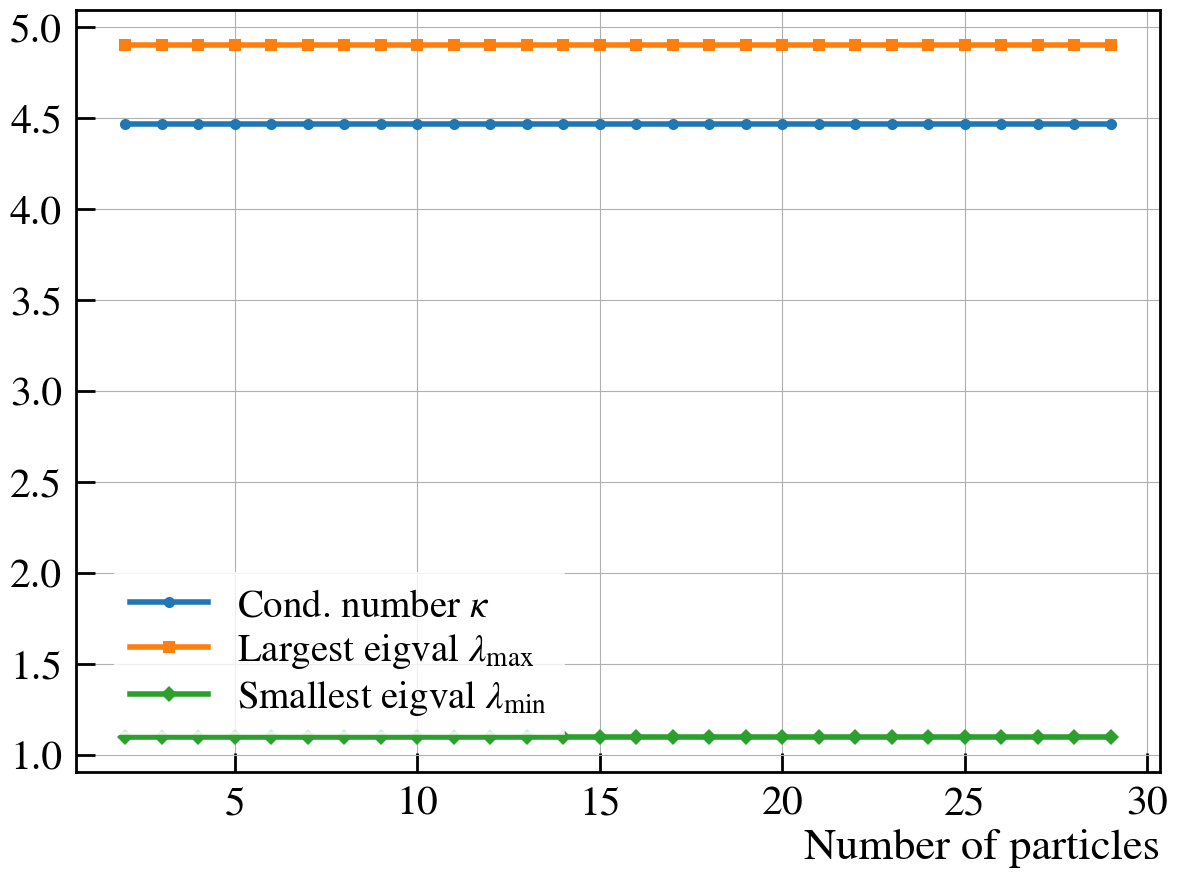

In [3]:
plt.plot(run.n_particles, run.kappa, label="Cond. number $\kappa$")
plt.plot(run.n_particles, run.lambda_max, label="Largest eigval $\lambda_\mathrm{max}$")
plt.plot(run.n_particles, run.lambda_min, label="Smallest eigval $\lambda_\mathrm{min}$")
plt.legend()
plt.xlabel("Number of particles")
plt.grid()

## $\kappa$ vs number of layers

In this case we keep the number of particles constant to 25 and vary the number of layers in the detector from 3 to 30.

In [4]:
MIN_LAYERS = 3            
MAX_LAYERS = 30
STEP = 1           
N_PARTICLES = 25
THRESHOLD = .45


@dataclass
class RunLayer:
    n_particles: int  = N_PARTICLES
    min_layers: int     = MIN_LAYERS
    max_layers: int     = MAX_LAYERS
    step: int           = STEP
    n_layers: int       = field(default_factory=list)
    lambda_min: list    = field(default_factory=list)
    lambda_max: list    = field(default_factory=list)
    kappa: list         = field(default_factory=list)
    hits : list         = field(default_factory=list)
    segments : list     = field(default_factory=list)
    detector : list     = DETECTOR
    max_theta : list    = np.pi / 3
    epsilon : float     = 1e-5
    gamma : float       = 2.0
    delta : float       = 1.0
    
              
    def execute(self):
        
        
        for n_layers in range(MIN_LAYERS, MAX_LAYERS,self.step):
            detector = SimpleDetectorGeometry([i for i in range(n_layers)], [float("+inf") for i in range(n_layers)], [float("+inf") for i in range(n_layers)], [i+1 for i in range(n_layers)])
            generator = SimpleGenerator(detector, theta_max=self.max_theta)
            event = generator.generate_event(self.n_particles)
            self.hits.append(len(event.hits))
            self.n_layers.append(n_layers)
            hamiltonian = SimpleHamiltonian(self.epsilon, self.gamma, self.delta)
            hamiltonian.construct_hamiltonian(event)
            largest_eigval,  = eigsh(hamiltonian.A, k=1, which="LM", return_eigenvectors=False)
            smallest_eigval,  = eigsh(hamiltonian.A, k=1, which="SM", return_eigenvectors=False)
            self.lambda_max.append(largest_eigval)
            self.lambda_min.append(smallest_eigval)
            kappa = np.abs(largest_eigval/smallest_eigval)
            self.kappa.append(kappa)
            self.segments.append(len(hamiltonian.segments))
            print(f"{n_layers}   {largest_eigval}    {smallest_eigval}   {kappa}")
            
            

In [5]:
runlayer = RunLayer()
runlayer.execute()

3   4.0    1.9999999999999991   2.000000000000001
4   4.414213562373096    1.5857864376269042   2.783611624891226
5   4.618033988749896    1.3819660112501035   3.3416407864998785
6   4.7320508075688785    1.267949192431121   3.7320508075688834
7   4.801937735804837    1.1980622641951582   4.008086957843308
8   4.847759065022578    1.1522409349774263   4.20724426451448
9   4.879385241571816    1.1206147584281823   4.354203980336499
10   4.90211303259031    1.0978869674096907   4.4650434681414914
11   4.918985947228996    1.081014052771003   4.550344127923202
12   4.93185165257814    1.0681483474218612   4.617197287700642
13   4.941883634852106    1.0581163651478946   4.670453834405416
14   4.949855824363653    1.0501441756363488   4.713501192695015
15   4.95629520146761    1.0437047985323853   4.748751954036187
16   4.961570560806461    1.0384294391935365   4.777956376756526
17   4.965946199367802    1.0340538006321962   4.802406022135153
18   4.969615506024415    1.0303844939755824   4

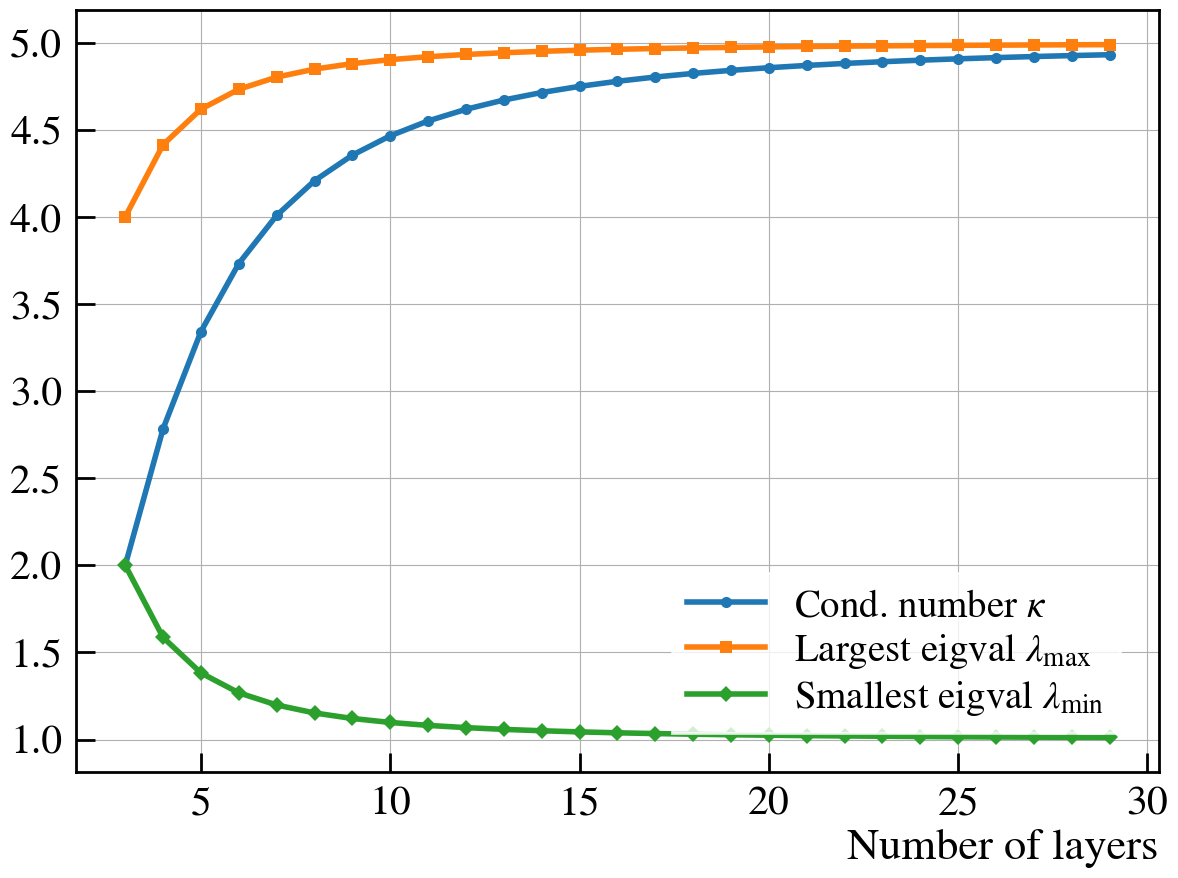

In [6]:
plt.plot(runlayer.n_layers, runlayer.kappa, label="Cond. number $\kappa$")
plt.plot(runlayer.n_layers, runlayer.lambda_max, label="Largest eigval $\lambda_\mathrm{max}$")
plt.plot(runlayer.n_layers, runlayer.lambda_min, label="Smallest eigval $\lambda_\mathrm{min}$")
plt.xlabel("Number of layers")
plt.legend()
plt.grid()

## Conclusions

The condition number $\kappa$ stays constant as a function of the number of particles while it increases asymptotically towards $\approx 5$ as a function of the number of detection layers.

In [7]:
import pickle as pk

user_input = input("Do you want to SAVE? (yes/no): ")
if user_input.lower() in ["yes", "y"]:
    print("Saving...")
    with open("kapparun.pkl", "wb") as f:
        pk.dump(run, f)
        
    with open("kapparunlayer.pkl", "wb") as f:
        pk.dump(runlayer, f)
        
        
else:
    print("NOPing...")

NOPing...
